In [1]:
import graphlab 
graphlab.get_dependencies()


ACTION REQUIRED: Dependencies libstdc++-6.dll and libgcc_s_seh-1.dll not found.

1. Ensure user account has write permission to C:\Anaconda3\envs\gl-env\lib\site-packages\graphlab
2. Run graphlab.get_dependencies() to download and install them.
3. Restart Python and import graphlab again.

By running the above function, you agree to the following licenses.

* libstdc++: https://gcc.gnu.org/onlinedocs/libstdc++/manual/license.html
* xz: http://git.tukaani.org/?p=xz.git;a=blob;f=COPYING
    

By running this function, you agree to the following licenses.

* libstdc++: https://gcc.gnu.org/onlinedocs/libstdc++/manual/license.html
* xz: http://git.tukaani.org/?p=xz.git;a=blob;f=COPYING
    
Extracting xz.
Extracting gcc-libs.


CalledProcessError: Command '['c:\\users\\atul~1.sin\\appdata\\local\\temp\\tmphcai4r\\bin_x86-64\\xz.exe', '-d', 'c:\\users\\atul~1.sin\\appdata\\local\\temp\\tmpbozmyr.xz']' returned non-zero exit status 1

In [1]:
# import
import graphlab as gl
import matplotlib.pyplot as plt
import numpy as np


ACTION REQUIRED: Dependencies libstdc++-6.dll and libgcc_s_seh-1.dll not found.

1. Ensure user account has write permission to C:\Anaconda3\envs\gl-env\lib\site-packages\graphlab
2. Run graphlab.get_dependencies() to download and install them.
3. Restart Python and import graphlab again.

By running the above function, you agree to the following licenses.

* libstdc++: https://gcc.gnu.org/onlinedocs/libstdc++/manual/license.html
* xz: http://git.tukaani.org/?p=xz.git;a=blob;f=COPYING
    


ImportError: No module named matplotlib.pyplot

In [108]:
gl.canvas.set_target('ipynb')
%matplotlib inline

In [109]:
# reading data
sales = gl.SFrame('data/kc_house_data.gl/')
sales = sales.sort(['sqft_living','price'])
sales.head(2)

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 2

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 3980300371 | 2014-09-26 00:00:00+00:00 | 142000.0 |   0.0    |    0.0    |
| 2856101479 | 2014-07-01 00:00:00+00:00 | 276000.0 |   1.0    |    0.75   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    290.0    |  20875   |   1    |     0      |  0   |     1     |   1   |    290     |
|    370.0    |   1801   |   1    |     0      |  0   |     5     |   5   |    370     |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|       0       |   1963   |      0       |  98024  | 47.53077245 |
|       0       |   1923   |      0       |  98117  | 47.67782145 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -121.88842327 |     1620.0    | ... |
| -122.38911208 |     1340.0    | ... |
+---------------+---------------+-----+
[2 rows x 21 columns]

In [110]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = gl.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            #poly_sframe[name]= feature.apply(lambda x: x**power)
            poly_sframe[name]= feature**power   # can use this as well
    return poly_sframe

In [117]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']
poly1_data_names = poly1_data.column_names()

In [118]:
model1 = gl.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.011007     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

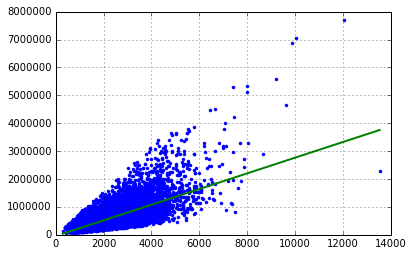

In [119]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
        poly1_data['power_1'], model1.predict(poly1_data), '-', linewidth=2)
plt.grid(True)

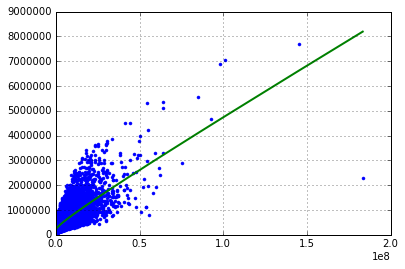

In [121]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data_names = poly2_data.column_names()
poly2_data['price'] = sales['price']


model2 = gl.linear_regression.create(poly2_data, target = 'price', features = poly2_data_names, 
                                     validation_set = None, verbose=False)

plt.plot(poly2_data['power_2'], poly2_data['price'], '.',
        poly2_data['power_2'], model2.predict(poly2_data), '-', linewidth=2)
plt.grid(True)

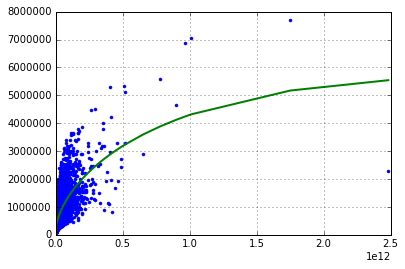

In [122]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data_names = poly3_data.column_names()
poly3_data['price'] = sales['price']

model3 = gl.linear_regression.create(poly3_data, target = 'price', features = poly3_data_names, validation_set = None, verbose=False)

plt.plot(poly3_data['power_3'], poly3_data['price'], '.',
        poly3_data['power_3'], model3.predict(poly3_data), '-', linewidth=2)
plt.grid(True)

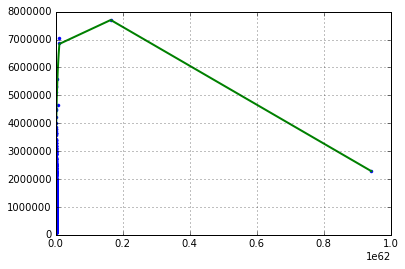

In [123]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data_names = poly15_data.column_names()
poly15_data['price'] = sales['price']

model15 = gl.linear_regression.create(poly15_data, target = 'price', features = poly15_data_names, validation_set = None, verbose=False)

plt.plot(poly15_data['power_15'], poly15_data['price'], '.',
        poly15_data['power_15'], model15.predict(poly15_data), '-', linewidth=2)
plt.grid(True)

```
first split sales into 2 subsets with .random_split(.5) use seed = 0!
next split these into 2 more subsets (4 total) using random_split(0.5) again set seed = 0!
you should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4
```

In [124]:
sales1, sales2 = sales.random_split(.5, seed = 0)
set_1, set_2 =   sales1.random_split(.5, seed = 0)
set_3, set_4 =   sales2.random_split(.5, seed = 0)

name,index,value,stderr
(intercept),None,223312.750249,733363.025988
power_1,None,118.086127588,2903.54146793
power_2,None,-0.0473482011347,4.46221745406
power_3,None,3.25310342469e-05,0.00314111911541
power_4,None,-3.3237215256e-09,nan
power_5,None,-9.75830457808e-14,nan
power_6,None,1.15440303429e-17,nan
power_7,None,1.05145869404e-21,nan
power_8,None,3.46049616547e-26,nan
power_9,None,-1.0965445418e-30,6.15656668872e-25


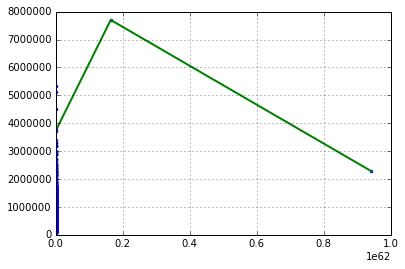

In [125]:
poly15_set_1 = polynomial_sframe(set_1['sqft_living'], 15)
poly15_set_1_names = poly15_set_1.column_names()
poly15_set_1['price'] = set_1['price']

#print(poly15_set_1.head(2))

model15_set_1 = gl.linear_regression.create(poly15_set_1, target = 'price', 
                                            features = poly15_set_1_names, validation_set = None,
                                            verbose=False)

plt.plot(poly15_set_1['power_15'], poly15_set_1['price'], '.',
         poly15_set_1['power_15'], model15_set_1.predict(poly15_set_1), '-', linewidth=2)
plt.grid(True)

model15_set_1.get('coefficients')

In [ ]:
poly15_set_2 = polynomial_sframe(set_2['sqft_living'], 15)
poly15_set_2['price'] = set_2['price']

model15_set_2 = gl.linear_regression.create(poly15_set_2, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_2['power_15'], poly15_set_2['price'], '.',
        poly15_set_2['power_15'], model15_set_2.predict(poly15_set_2), '-', linewidth=2)
plt.grid(True)

model15_set_2.get('coefficients')

In [ ]:
poly15_set_3 = polynomial_sframe(set_3['sqft_living'], 15)
poly15_set_3['price'] = set_3['price']

model15_set_3 = gl.linear_regression.create(poly15_set_3, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_3['power_15'], poly15_set_3['price'], '.',
        poly15_set_3['power_15'], model15_set_3.predict(poly15_set_3), '-', linewidth=2)
plt.grid(True)

model15_set_3.get('coefficients')

In [ ]:
poly15_set_4 = polynomial_sframe(set_4['sqft_living'], 15)
poly15_set_4['price'] = set_4['price']

model15_set_4 = gl.linear_regression.create(poly15_set_4, target = 'price', features = ['power_15'], validation_set = None, verbose=False)

plt.plot(poly15_set_4['power_15'], poly15_set_4['price'], '.',
        poly15_set_4['power_15'], model15_set_4.predict(poly15_set_4), '-', linewidth=2)
plt.grid(True)

model15_set_4.get('coefficients')

In [ ]:
training_and_validation, testing =  sales.random_split(0.9, seed=1)
training, validation =  training_and_validation.random_split(0.5, seed=1)

In [ ]:
RSS_validation = {}
RSS_testing = {}
for degree in range(1, 16):
    model_name = 'model_'+ str(degree)
    dataset_name = 'dataset_'+ str(degree)
    feature_name =  'power_'+ str(degree)
    
    validation_dataset = gl.SFrame()
    validation_dataset[feature_name] = validation['sqft_living']
    validation_dataset['price'] = validation['price']
    
    testing_dataset = gl.SFrame()
    testing_dataset[feature_name] = testing['sqft_living']
    testing_dataset['price'] = testing['price']
    
    dataset_name = polynomial_sframe(training['sqft_living'], degree)
    dataset_name['price'] = training['price']
    
    model_name = gl.linear_regression.create(dataset_name, 
                                             target = 'price', 
                                             features = [feature_name], 
                                             validation_set = None, 
                                             verbose = False)
    validation_dataset['prediction'] = model_name.predict(validation_dataset)
    #print(validation_dataset['prediction'])
    rss = np.sum(np.square(validation_dataset['price'] - validation_dataset['prediction']))
    rss2 = np.sum(np.square(testing_dataset['price'] - model_name.predict(testing_dataset)))

    RSS_validation[degree] = rss
    RSS_testing[degree] = rss2

In [ ]:
# sorting the dict
for k in sorted(RSS_validation, key=RSS_validation.get):
    print k,'\t',RSS_validation[k]

In [ ]:
RSS_validation

In [ ]:
x = gl.SArray((1,2,3))

In [ ]:
y = x.apply(lambda p: p**2)

In [ ]:
y

In [ ]:
features